<center><h2> Developing a Classification Model for
Predicting the Success of Sales Offers for Smart Infrastructure

#### Import Required Python Packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
random.seed(2022)

#### Read dataset into Pandas DataFrame

In [2]:
df_cust = pd.read_csv('customers.csv')
df_trans = pd.read_csv('transactions.csv')
df_geo = pd.read_csv('geo.csv')

df_trans.head()

,MO_ID,SO_ID,CUSTOMER,END_CUSTOMER,OFFER_PRICE,SERVICE_LIST_PRICE,MATERIAL_COST,SERVICE_COST,PRICE_LIST,ISIC,...,OFFER_TYPE,BUSINESS_TYPE,COSTS_PRODUCT_A,COSTS_PRODUCT_B,COSTS_PRODUCT_C,OFFER_STATUS,COSTS_PRODUCT_D,COSTS_PRODUCT_E,SALES_LOCATION,TEST_SET_ID
0,a050N000013fnfrQAA,a030N00001EochoQAB,"""1""",NaN,1711.0,1395.0,1107.0,186.30,SFT Standard,2100.0,...,IN,E,0.0,59.48,0.00,LOsT,0.0,0.0,Luzern Central,NaN
1,a050N000013fgL1QAI,a030N00001EociNQAR,"""2""",NaN,26687.6,14651.0,9282.0,7768.34,CMT Installer,7110.0,...,D,N,0.0,0.00,0.00,Lost,0.0,0.0,Zürich East,NaN
2,a050N000013fnwdQAA,a030N00001Eod9yQAB,"""3""",NaN,6264.7,2296.0,1722.0,2168.56,SFT Standard,6820.0,...,FIR,E,0.0,0.00,0.00,WIN,0.0,0.0,Luzern Central,NaN
3,a050N000013foAGQAY,a030N00001EodLEQAZ,"""4""",4,4300.2,310.0,246.0,2775.92,SFT Standard,3821.0,...,FIR,M,0.0,0.00,0.00,Win,0.0,0.0,Basel Central,NaN
4,a050N000013foKVQAY,a030N00001EoeBiQAJ,"""5""",NaN,13693.0,5815.0,4674.0,4179.38,SFT Standard,4719.0,...,FIR,E,0.0,0.00,1854.01,WIN,0.0,0.0,Geneva West,NaN


### Data Cleaning and preprocessing

In [3]:
df_trans['CUSTOMER'] = df_trans['CUSTOMER'].str.replace('"', '')
df_trans['CUSTOMER'] = df_trans['CUSTOMER'].replace('NA', np.NaN)

In [4]:
df_trans['CUSTOMER'] = df_trans['CUSTOMER'].replace('#NV', np.NaN)
df_trans['CUSTOMER'] = df_trans['CUSTOMER'].astype(float)

In [5]:
def build_transaction_counter(self,data):
    """"""
    # Count succesfull transactions, not working right now
    data.SO_CREATED_DATE_DATE = pd.to_datetime(data['SO_CREATED_DATE']).dt.date
    file_w_geo_sub_cus = data.sort_values(by='SO_CREATED_DATE', ascending=True)
    lst_ = file_w_geo_sub_cus.drop_duplicates(
        subset=['CUSTOMER', 'COUNTRY'])
    # lst_ = lst_[['CUSTOMER', 'COUNTRY']].to_numpy()

def find_countrys(data):
    data.COUNTRY = data.COUNTRY.fillna('None')
    data['COUNTRY'] = data.COUNTRY.apply(lambda x: 'Switzerland' if 'CH' in x else x)
    data['COUNTRY'] = data.COUNTRY.apply(lambda x: 'France' if 'FR' in x else x)
    return data

def clean_end_cusomter(data):
    customer_list = data['CUSTOMER'].astype(str).to_list()
    data.END_CUSTOMER = data['END_CUSTOMER'].apply(lambda x: end_cusomter(customer_list, x))
    return data


def find_number(text):
    if text in ['LOsT', 'Lost', 'LOST', 'Lose']:
        return 0
    if text in ['WIN', 'Win', 'WON', 'Won']:
        return 1
    else:
        return None
        
def end_cusomter(customer_list,text):
    if text != text:
        return None
    if text in customer_list or text == 'Yes':
        return 'yes'
    elif not text in customer_list or text == 'No':
        return 'no'

def clean_transactions(transactions):
    """Cleans the input dataframe"""
    global df_trans
    df_trans['OFFER_STATUS'] = df_trans['OFFER_STATUS'].apply(lambda x: find_number(x))
    ids = df_trans.MO_CREATED_DATE.unique()
    for id in ids:
        df_trans['Suboffer'] = len(df_trans.loc[df_trans.MO_ID == id])
    return df_trans

def clean_customer(customer):
    """Cleans the customer dataframe"""
    customer['REV_CURRENT_YEAR'] = pd.to_numeric(customer['REV_CURRENT_YEAR'].str.strip('\"'), errors='coerce')
    return customer

In [6]:
df_geo = find_countrys(df_geo)
df_trans = clean_transactions(df_trans)
df_trans = clean_end_cusomter(df_trans)
df_cust = clean_customer(df_cust)

### Combining dataframes

In [18]:
geo_df_trans = df_trans.merge(df_geo, left_on='SALES_LOCATION', right_on='SALES_LOCATION', how='left')


geo_trans_costumer = geo_df_trans.merge(df_cust, left_on=['CUSTOMER', 'COUNTRY'],
                                                  right_on=['CUSTOMER', 'COUNTRY'], how='left')

In [19]:
#TEST_SET_ID
#END_CUSTOMER
#OFFER_STATUS

In [20]:
geo_trans_costumer.select_dtypes(include='object')

,MO_ID,SO_ID,END_CUSTOMER,PRICE_LIST,MO_CREATED_DATE,SO_CREATED_DATE,TECH,OFFER_TYPE,BUSINESS_TYPE,SALES_LOCATION,COUNTRY,SALES_OFFICE,SALES_BRANCH,CREATION_YEAR,OWNERSHIP,CURRENCY
0,a050N000013fnfrQAA,a030N00001EochoQAB,None,SFT Standard,14.01.2019 08:43,14.01.2019 08:45,S,IN,E,Luzern Central,Switzerland,Luzern,Branch Central,01/01/2004,Privately Owned/Publicly Traded,Chinese Yuan
1,a050N000013fgL1QAI,a030N00001EociNQAR,None,CMT Installer,12.01.2019 16:36,14.01.2019 08:50,C,D,N,Zürich East,Switzerland,Zürich,Branch East,01.01.2004,Privately Owned/Publicly Traded,Chinese Yuan
2,a050N000013fnwdQAA,a030N00001Eod9yQAB,None,SFT Standard,14.01.2019 10:16,14.01.2019 10:16,F,FIR,E,Luzern Central,Switzerland,Luzern,Branch Central,NaN,NaN,NaN
3,a050N000013foAGQAY,a030N00001EodLEQAZ,no,SFT Standard,14.01.2019 11:03,14.01.2019 11:08,F,FIR,M,Basel Central,Switzerland,Basel,Branch Central,01.01.2003,Privately Owned/Publicly Traded,Euro
4,a050N000013foKVQAY,a030N00001EoeBiQAJ,None,SFT Standard,14.01.2019 11:31,14.01.2019 11:32,F,FIR,E,Geneva West,Switzerland,Geneva,Branch West,01/01/2004,Privately Owned/Publicly Traded,Euro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,a055p00001P3tMfAAJ,a035p00001Sy71qAAB,None,Tarif public,2021-06-17 12:42:07,2021-06-17 12:42:08,F,FDI,Mig,Metz Grand Est,France,Metz,Grand Est,01.01.2009,Privately Owned/Publicly Traded,Pound Sterling
26147,a055p00001P3wpsAAB,a035p00001Sy9dXAAR,no,Tarif public,2021-06-21 11:38:09,2021-06-21 11:38:10,F,FDD,New,Rouen Nord FR,France,Rouen,Nord FR,01.01.2009,Privately Owned/Publicly Traded,Chinese Yuan
26148,a055p00001P3xMpAAJ,a035p00001SyA1wAAF,no,Tarif public,2021-06-21 15:00:58,2021-06-21 15:00:59,F,FDI,Exp,Grenoble Centre-Est,France,Grenoble,Centre-Est,01/01/2005,Privately Owned/Publicly Traded,US Dollar
26149,a055p00001P3xqwAAB,a035p00001SyAQoAAN,yes,Tarif public,2021-06-21 18:14:22,2021-06-21 18:14:23,F,FDD,Mig,Dijon Centre-Est,France,Dijon,Centre-Est,01/01/2005,Privately Owned/Publicly Traded,US Dollar


In [21]:
## Convert required categorical features inot numeical, so they can be further used for model development
for feature in ['PRICE_LIST', 'TECH', 'OFFER_TYPE', 'BUSINESS_TYPE', 'SALES_LOCATION', 'COUNTRY', 'SALES_OFFICE', 'SALES_BRANCH',
                    'OWNERSHIP', 'CURRENCY']:
    
    geo_trans_costumer[feature] = pd.factorize(geo_trans_costumer[feature])[0]    

#### Dealing with missing values

In [22]:
#The features with missing values
total = geo_trans_costumer.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns = ["Missing Values"])
missing_data

,Missing Values
TEST_SET_ID,23575
END_CUSTOMER,20114
CREATION_YEAR,2921
REV_CURRENT_YEAR.2,2921
REV_CURRENT_YEAR.1,2921
REV_CURRENT_YEAR,2921
OFFER_STATUS,2576
ISIC,1675
CUSTOMER,1363
Suboffer,0


In [23]:
## features with missing values
for feature in ["ISIC", "CUSTOMER", "REV_CURRENT_YEAR", "REV_CURRENT_YEAR.1", "REV_CURRENT_YEAR.2"]:
    mean = geo_trans_costumer[feature].mean()
    std = geo_trans_costumer[feature].std()
    is_null = geo_trans_costumer[feature].isnull().sum()
    # Get random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in each feature column with random values generated
    feature_slice = geo_trans_costumer[feature].copy()
    feature_slice[np.isnan(feature_slice)] = rand_age
    geo_trans_costumer[feature] = feature_slice

In [24]:
geo_trans_costumer['SALES_LOCATION'].fillna('Geneva West', inplace=True)
#geo_trans_costumer['OFFER_STATUS'].fillna(1.0, inplace=True)

geo_trans_costumer['OFFER_STATUS'].isnull().sum()

2576

In [25]:
geo_trans_costumer

,MO_ID,SO_ID,CUSTOMER,END_CUSTOMER,OFFER_PRICE,SERVICE_LIST_PRICE,MATERIAL_COST,SERVICE_COST,PRICE_LIST,ISIC,...,Suboffer,COUNTRY,SALES_OFFICE,SALES_BRANCH,REV_CURRENT_YEAR,REV_CURRENT_YEAR.1,REV_CURRENT_YEAR.2,CREATION_YEAR,OWNERSHIP,CURRENCY
0,a050N000013fnfrQAA,a030N00001EochoQAB,1.0,None,1711.00,1395.00,1107.0,186.30,0,2100.0,...,0,0,0,0,8.128392e+04,8.128392e+04,3.220362e+04,01/01/2004,0,0
1,a050N000013fgL1QAI,a030N00001EociNQAR,2.0,None,26687.60,14651.00,9282.0,7768.34,1,7110.0,...,0,0,1,1,0.000000e+00,0.000000e+00,0.000000e+00,01.01.2004,0,0
2,a050N000013fnwdQAA,a030N00001Eod9yQAB,3.0,None,6264.70,2296.00,1722.0,2168.56,0,6820.0,...,0,0,0,0,-2.083163e+06,4.372703e+06,1.856164e+06,NaN,-1,-1
3,a050N000013foAGQAY,a030N00001EodLEQAZ,4.0,no,4300.20,310.00,246.0,2775.92,0,3821.0,...,0,0,2,0,1.266884e+04,1.266884e+04,3.273118e+04,01.01.2003,0,1
4,a050N000013foKVQAY,a030N00001EoeBiQAJ,5.0,None,13693.00,5815.00,4674.0,4179.38,0,4719.0,...,0,0,3,2,7.130980e+03,7.130980e+03,1.021086e+04,01/01/2004,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,a055p00001P3tMfAAJ,a035p00001Sy71qAAB,2112.0,None,14200.00,5532.00,3541.0,8855.55,3,3314.0,...,0,1,17,9,3.046244e+04,3.046244e+04,2.200744e+03,01.01.2009,0,3
26147,a055p00001P3wpsAAB,a035p00001Sy9dXAAR,2142.0,no,5140.51,3626.15,3074.8,828.14,3,3830.0,...,0,1,25,6,7.886991e+05,7.886991e+05,4.830282e+05,01.01.2009,0,0
26148,a055p00001P3xMpAAJ,a035p00001SyA1wAAF,97.0,no,2672.00,2672.00,1731.2,0.00,3,4321.0,...,0,1,26,8,6.342747e+05,6.342747e+05,9.718289e+05,01/01/2005,0,2
26149,a055p00001P3xqwAAB,a035p00001SyAQoAAN,1993.0,yes,16961.99,12345.00,8925.2,1878.25,3,8610.0,...,0,1,29,8,2.985272e+04,2.985272e+04,1.891347e+05,01/01/2005,0,2


In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = geo_trans_costumer.select_dtypes(include=numerics)
newdf

,CUSTOMER,OFFER_PRICE,SERVICE_LIST_PRICE,MATERIAL_COST,SERVICE_COST,PRICE_LIST,ISIC,TECH,OFFER_TYPE,BUSINESS_TYPE,...,TEST_SET_ID,Suboffer,COUNTRY,SALES_OFFICE,SALES_BRANCH,REV_CURRENT_YEAR,REV_CURRENT_YEAR.1,REV_CURRENT_YEAR.2,OWNERSHIP,CURRENCY
0,1.0,1711.00,1395.00,1107.0,186.30,0,2100.0,0,0,0,...,NaN,0,0,0,0,8.128392e+04,8.128392e+04,3.220362e+04,0,0
1,2.0,26687.60,14651.00,9282.0,7768.34,1,7110.0,1,1,1,...,NaN,0,0,1,1,0.000000e+00,0.000000e+00,0.000000e+00,0,0
2,3.0,6264.70,2296.00,1722.0,2168.56,0,6820.0,2,2,0,...,NaN,0,0,0,0,-2.083163e+06,4.372703e+06,1.856164e+06,-1,-1
3,4.0,4300.20,310.00,246.0,2775.92,0,3821.0,2,2,2,...,NaN,0,0,2,0,1.266884e+04,1.266884e+04,3.273118e+04,0,1
4,5.0,13693.00,5815.00,4674.0,4179.38,0,4719.0,2,2,0,...,NaN,0,0,3,2,7.130980e+03,7.130980e+03,1.021086e+04,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26146,2112.0,14200.00,5532.00,3541.0,8855.55,3,3314.0,2,22,7,...,NaN,0,1,17,9,3.046244e+04,3.046244e+04,2.200744e+03,0,3
26147,2142.0,5140.51,3626.15,3074.8,828.14,3,3830.0,2,20,6,...,NaN,0,1,25,6,7.886991e+05,7.886991e+05,4.830282e+05,0,0
26148,97.0,2672.00,2672.00,1731.2,0.00,3,4321.0,2,22,5,...,NaN,0,1,26,8,6.342747e+05,6.342747e+05,9.718289e+05,0,2
26149,1993.0,16961.99,12345.00,8925.2,1878.25,3,8610.0,2,20,7,...,NaN,0,1,29,8,2.985272e+04,2.985272e+04,1.891347e+05,0,2


In [27]:
newdf.isnull().sum()

CUSTOMER                  0
OFFER_PRICE               0
SERVICE_LIST_PRICE        0
MATERIAL_COST             0
SERVICE_COST              0
PRICE_LIST                0
ISIC                      0
TECH                      0
OFFER_TYPE                0
BUSINESS_TYPE             0
COSTS_PRODUCT_A           0
COSTS_PRODUCT_B           0
COSTS_PRODUCT_C           0
OFFER_STATUS           2576
COSTS_PRODUCT_D           0
COSTS_PRODUCT_E           0
SALES_LOCATION            0
TEST_SET_ID           23575
Suboffer                  0
COUNTRY                   0
SALES_OFFICE              0
SALES_BRANCH              0
REV_CURRENT_YEAR          0
REV_CURRENT_YEAR.1        0
REV_CURRENT_YEAR.2        0
OWNERSHIP                 0
CURRENCY                  0
dtype: int64

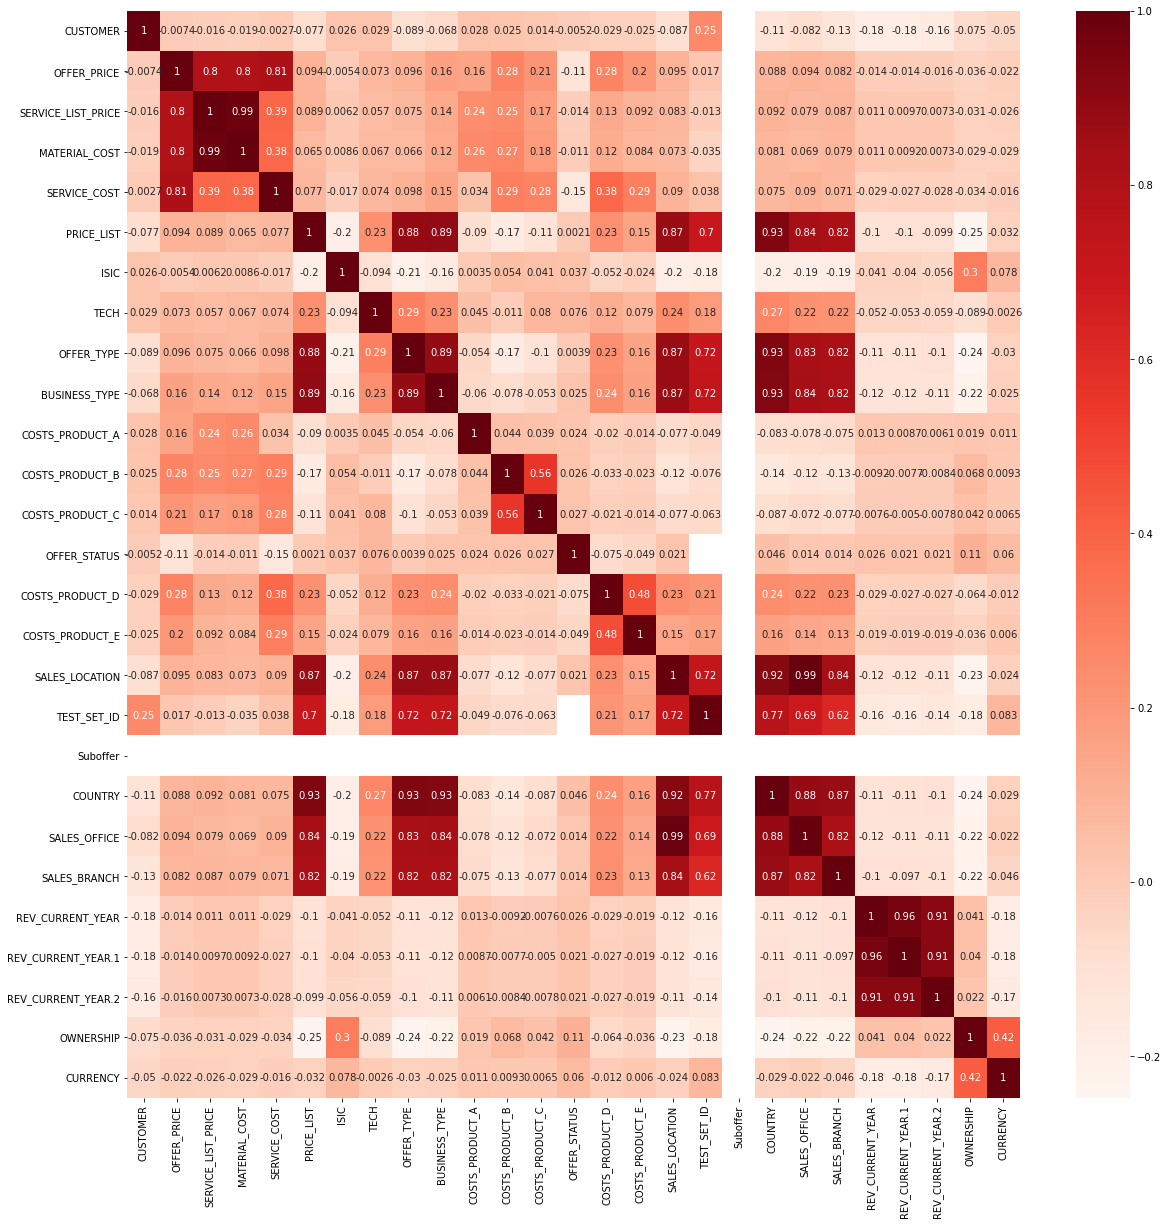

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = newdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [156]:
X_train = newdf.drop(['TEST_SET_ID', 'OFFER_PRICE', 'SERVICE_LIST_PRICE','PRICE_LIST', 'OFFER_TYPE', 'SALES_OFFICE',
                      'SALES_BRANCH', 'MATERIAL_COST','REV_CURRENT_YEAR.1', 'REV_CURRENT_YEAR.2'], axis = 1).dropna()
y_train = newdf['OFFER_STATUS'].dropna()
X_train.shape, y_train.shape

((23575, 17), (23575,))

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X_train.drop('OFFER_STATUS', axis = 1), y_train, test_size=0.1)
X_train.shape, X_test1.shape

((21217, 16), (2358, 16))

In [158]:
X_test = newdf.drop(['OFFER_PRICE', 'SERVICE_LIST_PRICE','PRICE_LIST', 'OFFER_TYPE', 'SALES_OFFICE', 'SALES_BRANCH', 'MATERIAL_COST','REV_CURRENT_YEAR.1', 'REV_CURRENT_YEAR.2', 'OFFER_STATUS'], axis = 1).dropna()

### Balancing dataset

In [159]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)
# define pipeline
over = SMOTE()
under = RandomUnderSampler()
# transform the dataset
X_train, y_train = under.fit_resample(X_train, y_train)
y_train.value_counts()

Counter({1.0: 17039, 0.0: 4178})


0.0    4178
1.0    4178
Name: OFFER_STATUS, dtype: int64

### Random Forest Model

In [160]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV

In [132]:
#### This code is commented to stop re-execution of code to find best parameters again. #####
#Setting values for the parameters

#rf = RandomForestClassifier()
#Setting values for the parameters
#n_estimators = [100, 300, 500]
#max_depth = [10, 15, 25, 30]
#min_samples_split = [5, 10, 15]
#min_samples_leaf = [2, 5, 10]

#Creating a dictionary for the hyper parameters
#hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
#              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
#gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
#bestrf = gridrf.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [133]:
#Printing the best hyperparameters
#print('The best hyper parameters are: \n',gridrf.best_params_)

The best hyper parameters are: 
 {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}


### Fitting the model with best parameters


In [174]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=15, n_estimators=300)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=300)

In [175]:
pred_rf1 = rf.predict(X_test1)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test1, pred_rf1)

0.7136728045309583

In [177]:
pred_rf1 = rf.predict(X_test.drop('TEST_SET_ID', axis = 1))

### KNN Model

Maximum accuracy:- 0.607822375093909 at K = 4


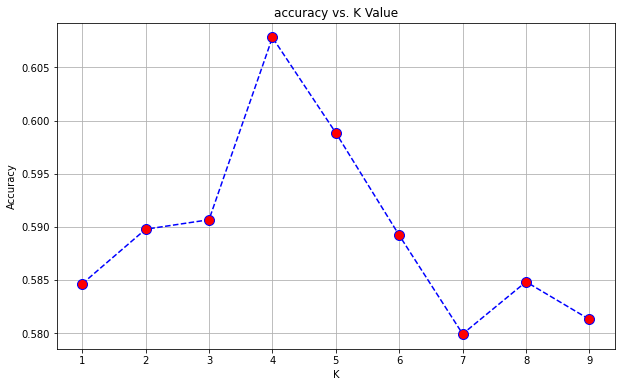

In [164]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,10):
    
    # train the model

    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    
    # Develop predictions on test data

    yhat = neigh.predict(X_test1)
    acc.append(balanced_accuracy_score(y_test1, yhat))
    
# plotting the figure for error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
# Select the best K with maximum accuracy value on test data
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc)))+1)

### BaggingClassifier

In [235]:
#Setting values for the parameters
bagg = BaggingClassifier()

n_estimators = [100, 300, 500]
max_depth = [5, 10, 15]
max_samples = [5, 10, 25]
max_features = [1, 2, 5]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [236]:
bag_pred = bestbag.predict(X_test1)
balanced_accuracy_score(y_test1, bag_pred)

0.6541602688340479

In [178]:
df_check = pd.DataFrame({'TEST_SET_ID': X_test['TEST_SET_ID'], 'OFFER_STATUS': pred_rf1})

df_check = df_check.astype(int)
df_check

,TEST_SET_ID,OFFER_STATUS
5,6,0
8,9,0
13,14,1
34,35,1
35,36,0
...,...,...
26018,26019,1
26032,26033,0
26049,26050,1
26057,26058,0


In [179]:
df_check.to_csv('submission_file.csv', index = False)

<center><h2> THE END